In [1]:
import pandas as pd
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, GridSearchCV
import matplotlib.pyplot as plt


In [19]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [20]:
#gère la date
datetime_columns = train.select_dtypes(include=['object']).columns

for col in datetime_columns:
    try:
        train[col] = pd.to_datetime(train[col], errors='raise')
        test[col] = pd.to_datetime(test[col], errors='raise')
        train[col] = train[col].astype(np.int64) / 10**9
        test[col] = test[col].astype(np.int64) / 10**9
        print(f"Converted '{col}' to epoch time.")
    except Exception:
        continue

/var/folders/5j/l8lw0l1j2414txlrl7kh66d00000gn/T/ipykernel_86505/3539319787.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  train[col] = pd.to_datetime(train[col], errors='raise')
/var/folders/5j/l8lw0l1j2414txlrl7kh66d00000gn/T/ipykernel_86505/3539319787.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  train[col] = pd.to_datetime(train[col], errors='raise')
/var/folders/5j/l8lw0l1j2414txlrl7kh66d00000gn/T/ipykernel_86505/3539319787.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  train[col] = pd.to_datetime(train[col], errors='raise')
/var/folders/5j/l8lw0l1j2414

Converted 'Policy Start Date' to epoch time.


/var/folders/5j/l8lw0l1j2414txlrl7kh66d00000gn/T/ipykernel_86505/3539319787.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  train[col] = pd.to_datetime(train[col], errors='raise')
/var/folders/5j/l8lw0l1j2414txlrl7kh66d00000gn/T/ipykernel_86505/3539319787.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  train[col] = pd.to_datetime(train[col], errors='raise')
/var/folders/5j/l8lw0l1j2414txlrl7kh66d00000gn/T/ipykernel_86505/3539319787.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  train[col] = pd.to_datetime(train[col], errors='raise')
/var/folders/5j/l8lw0l1j2414

In [21]:
#gère les NaN avec la médiane
numeric_columns = train.select_dtypes(include=['number']).columns
for col in numeric_columns:
    if col in test.columns:
        median_value = train[col].median()
        train[col].fillna(median_value, inplace=True)
        test[col].fillna(median_value, inplace=True)

object_columns = train.select_dtypes(include=['object']).columns
for col in object_columns:
    if col in test.columns:
        train[col].fillna("Unknown", inplace=True)
        test[col].fillna("Unknown", inplace=True)

/var/folders/5j/l8lw0l1j2414txlrl7kh66d00000gn/T/ipykernel_86505/2444580452.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train[col].fillna(median_value, inplace=True)
/var/folders/5j/l8lw0l1j2414txlrl7kh66d00000gn/T/ipykernel_86505/2444580452.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always 

In [22]:
#one hot auto
le = LabelEncoder()
object_columns = train.select_dtypes(include=['object']).columns
for column_name in object_columns:
    train[column_name] = le.fit_transform(train[column_name])    
    test[column_name] = le.transform(test[column_name])

In [23]:
donnee = train
#on prend une fraction pour mieux tourner
donnee=donnee.sample(frac=0.5, random_state=42)
X = donnee.drop(columns=['id', 'Premium Amount'])
y = donnee['Premium Amount']

In [7]:
#passer au log+1 car colle avec la métrique RMSLE
y = np.log1p(y)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Normalisation de X
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

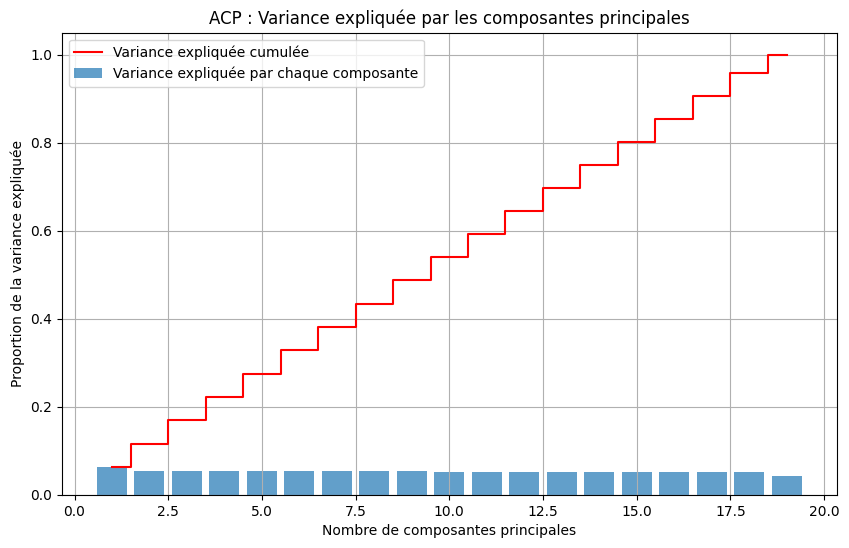

Composante 1: Variance expliquée = 0.0623
Composante 2: Variance expliquée = 0.0538
Composante 3: Variance expliquée = 0.0533
Composante 4: Variance expliquée = 0.0531
Composante 5: Variance expliquée = 0.0530
Composante 6: Variance expliquée = 0.0530
Composante 7: Variance expliquée = 0.0529
Composante 8: Variance expliquée = 0.0529
Composante 9: Variance expliquée = 0.0528
Composante 10: Variance expliquée = 0.0527
Composante 11: Variance expliquée = 0.0526
Composante 12: Variance expliquée = 0.0526
Composante 13: Variance expliquée = 0.0523
Composante 14: Variance expliquée = 0.0523
Composante 15: Variance expliquée = 0.0522
Composante 16: Variance expliquée = 0.0521
Composante 17: Variance expliquée = 0.0520
Composante 18: Variance expliquée = 0.0519
Composante 19: Variance expliquée = 0.0422


In [9]:
#PCA pour voir les composantes principales
pca=PCA()
X_train_pca = pca.fit_transform(X_train_scaled)
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.7, align='center', 
        label='Variance expliquée par chaque composante')
plt.step(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, where='mid', 
         label='Variance expliquée cumulée', color='red')
plt.xlabel('Nombre de composantes principales')
plt.ylabel('Proportion de la variance expliquée')
plt.title('ACP : Variance expliquée par les composantes principales')
plt.legend(loc='best')
plt.grid(True)
plt.show()

# Afficher les valeurs exactes de la variance expliquée
for i, var in enumerate(explained_variance_ratio, start=1):
    print(f"Composante {i}: Variance expliquée = {var:.4f}")

In [10]:
donnee.head()

,id,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,...,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Premium Amount
372605,372605,52.0,0,5538.0,1,2.0,2,0,8.093145,0,...,0.0,18.0,497.0,3.0,1.581348e+09,0,0,3,0,2742.0
551204,551204,60.0,0,39711.0,1,4.0,0,0,24.578648,1,...,0.0,3.0,340.0,3.0,1.602862e+09,2,0,3,0,1347.0
240320,240320,58.0,0,2364.0,1,2.0,0,3,34.452482,2,...,2.0,19.0,595.0,7.0,1.609601e+09,2,0,1,2,2196.0
1047361,1047361,39.0,1,9094.0,0,0.0,0,3,26.241661,0,...,1.0,17.0,761.0,5.0,1.652282e+09,2,1,2,1,684.0
555362,555362,47.0,1,43189.0,0,2.0,3,3,26.691921,1,...,1.0,4.0,319.0,4.0,1.595950e+09,2,1,3,0,1714.0


In [11]:
df = X_train.copy()
df['goal'] = y_train.values

In [12]:
df.head()

,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,Policy Type,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,goal
243623,35.0,1,61782.0,2,2.0,2,1,13.668800,2,0,2.0,2.0,578.0,2.0,1.590679e+09,2,0,1,0,7.545390
998863,22.0,1,1138.0,1,0.0,3,1,15.868228,0,1,1.0,8.0,595.0,8.0,1.700926e+09,1,0,0,1,7.643483
393405,64.0,1,8892.0,0,0.0,1,1,34.812335,0,1,1.0,13.0,507.0,3.0,1.632065e+09,0,1,1,1,7.040536
796139,45.0,0,7516.0,1,4.0,1,2,17.694616,1,0,1.0,19.0,695.0,4.0,1.602257e+09,0,0,1,1,6.251904
617294,42.0,0,23911.0,1,2.0,1,3,25.481210,0,0,2.0,2.0,404.0,4.0,1.599665e+09,2,0,1,1,6.003887


In [13]:

model = HistGradientBoostingRegressor(random_state=42)

param_grid = {
    'max_iter': [80,120, 180], 
    'learning_rate': [0.05, 0.1,0.13],
    'max_depth': [7, 10,13],  # Profondeur des arbres
    'min_samples_leaf': [20,30,40,50],  # Nombre minimum d'échantillons dans un enfant
    'l2_regularization': [0.1, 0.3,0.5],  # Regularisation L2
    'max_leaf_nodes': [20, 30,45]  # Nombre maximum de feuilles par arbre
}

#grid search
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='neg_root_mean_squared_error')
grid_search.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[CV] END ........................................max_iter=80; total time=  14.1s
[CV] END ........................................max_iter=80; total time=  14.3s
[CV] END ........................................max_iter=80; total time=  14.9s
[CV] END ........................................max_iter=80; total time=  15.5s
[CV] END .......................................max_iter=120; total time=   9.6s
[CV] END ........................................max_iter=80; total time=  10.9s
[CV] END .......................................max_iter=120; total time=  10.4s
[CV] END .......................................max_iter=120; total time=  12.6s
[CV] END .......................................max_iter=120; total time=   9.8s
[CV] END .......................................max_iter=180; total time=  11.4s
[CV] END .......................................max_iter=120; total time=  13.0s
[CV] END .......................................max_iter=180; total time=  12.4s
[CV] END ...................

GridSearchCV(cv=5, estimator=HistGradientBoostingRegressor(random_state=42),
             n_jobs=-1, param_grid={'max_iter': [80, 120, 180]},
             scoring='neg_root_mean_squared_error', verbose=2)

In [14]:
#pour tester avec des params définis,sans grid search
mod=HistGradientBoostingRegressor(l2_regularization= 0.1, learning_rate= 0.05, max_depth= 13, max_iter= 180, max_leaf_nodes= 45, min_samples_leaf= 50)
mod.fit(X_train_scaled, y_train)
y_pred = mod.predict(X_test_scaled)

In [15]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"R²: {r2}, MSE: {mse}")

#benchmark aprèq quelques tests
bench_0_3_recompo=0.03538553666517963
bench_0_8_recomp,mse_0_8_Rec=0.06678006662548763,1.122232703200161
best_param_base={'l2_regularization': 0.3, 'learning_rate': 0.05, 'max_depth': 13, 'max_iter': 180, 'max_leaf_nodes': 45, 'min_samples_leaf': 30}

R²: 0.08470556444216981, MSE: 1.0985379356366094


In [16]:
best_param=grid_search.best_params_
print('Les meilleurs paramètres sont:',best_param)

Les meilleurs paramètres sont: {'max_iter': 120}


In [17]:
X=test.drop(columns=['id'])
scaler=StandardScaler()
test_scaled = scaler.fit_transform(X)

In [18]:
y_pred_test=best_model.predict(test_scaled)
test['Premium Amount']=np.expm1(y_pred_test) #on repasse à l'expm1 pour contrer lerésultat en logp1
test1=test[['id','Premium Amount']] #seules colonnes intéressantes
test1.to_csv('submission_nop.csv',index=False) #pas oublier index=False pour pas avoir l'index en plus